In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from nnModels import PeripheryNet

In [3]:
periModel = PeripheryNet()
periModel.load('100pOn90000')

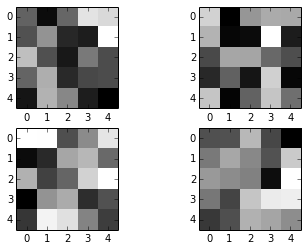

In [38]:
W = periModel.model.layers[0]
kernels = W.get_weights()[0]
for i,k in enumerate(kernels):
    plt.subplot(221+i)
    plt.imshow(k[0],cmap=cm.binary,interpolation='nearest')

In [39]:
periModel = PeripheryNet()
periModel.load('100pOn90000V2')

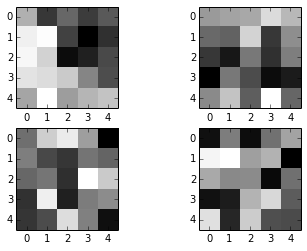

In [40]:
W = periModel.model.layers[0]
kernels = W.get_weights()[0]
for i,k in enumerate(kernels):
    plt.subplot(221+i)
    plt.imshow(k[0],cmap=cm.binary,interpolation='nearest')

In [41]:
periModel = PeripheryNet()
periModel.load('100pOn90000_Overfit')

In [50]:
from keras.utils import np_utils
data = np.load('data/peripheryImages.npy')
answers = np.load('data/peripheryIndexes.npy')
answers = np_utils.to_categorical(answers, 16)

In [52]:
predictions = periModel.predict(data[:10000])
right = 0
topHalf = 0
for i, j in enumerate(predictions):
    if np.argmax(j) == np.argmax(answers[i]):
        right += 1
    if np.argmax(answers[i]) in np.argpartition(j, -8)[-8:]:
        topHalf += 1
print("First choice cases: {0}".format(float(right)/len(predictions)))
print("Top half of cases: {0}".format(float(topHalf)/len(predictions)))

First choice cases: 0.04
Top half of cases: 0.52
